In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Mining

#### Read the datasets

###### Accident Data

In [2]:
col18 = pd.read_csv("collision-2018.csv", low_memory=False)
col19 = pd.read_csv("collision-2019.csv", low_memory=False)
col20 = pd.read_csv("collision-2020.csv", low_memory=False)
col21 = pd.read_csv("collision-2021.csv", low_memory=False)

In [3]:
cas18 = pd.read_csv("casualty-2018.csv", low_memory=False)
cas19 = pd.read_csv("casualty-2019.csv", low_memory=False)
cas20 = pd.read_csv("casualty-2020.csv", low_memory=False)
cas21 = pd.read_csv("casualty-2021.csv", low_memory=False)

In [4]:
veh18 = pd.read_csv("vehicle-2018.csv", low_memory=False)
veh19 = pd.read_csv("vehicle-2019.csv", low_memory=False)
veh20 = pd.read_csv("vehicle-2020.csv", low_memory=False)
veh21 = pd.read_csv("vehicle-2021.csv", low_memory=False)

#### Encoding the variables

In [5]:
# Load the data guide
data_guide = pd.read_excel("data-guide.xlsx")
data_guide.head()

,table,field name,code/format,label,note
0,Accident,collision_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,collision_year,NaN,NaN,NaN
2,Accident,collision_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
4,Accident,accident_year,NaN,NaN,NaN


In [6]:
#before merging the datasets, lets decoded some of the encoded fields with their respective values.
#starting with collision data-set
encoded_fields_col = ['police_force','accident_severity','day_of_week',
                      'local_authority_district','first_road_class','road_type',
                     'junction_detail','junction_control','second_road_class',
                      'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
                     'light_conditions','weather_conditions','road_surface_conditions',
                     'special_conditions_at_site','carriageway_hazards',
                     'urban_or_rural_area','did_police_officer_attend_scene_of_accident',
                     'trunk_road_flag']
col18[encoded_fields_col].head()

,police_force,accident_severity,day_of_week,local_authority_district,first_road_class,road_type,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,1,3,2,2,3,3,0,-1,0,0,0,4,1,1,0,0,1,1,2
1,1,3,2,17,4,6,2,4,6,0,0,4,1,1,0,0,1,1,2
2,1,3,2,3,3,6,6,4,5,0,5,4,1,1,0,0,1,1,2
3,1,2,2,17,4,3,7,2,3,0,5,4,2,2,0,0,1,1,2
4,1,2,2,6,3,6,0,-1,0,0,0,4,1,2,0,0,1,1,2


In [7]:
data_guide_col = data_guide.loc[ data_guide['table']=='Accident',:]
for encoded_fields in encoded_fields_col:
    encoded_fields_guide = data_guide_col.loc[ data_guide_col['field name']==encoded_fields, :]
    codes = encoded_fields_guide['code/format'].values
    for code in codes:
        col18.loc[col18[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        col19.loc[col19[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        col20.loc[col20[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        col21.loc[col21[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
col18[encoded_fields_col].head()

,police_force,accident_severity,day_of_week,local_authority_district,first_road_class,road_type,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,Metropolitan Police,Slight,Monday,Camden,A,Dual carriageway,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk
1,Metropolitan Police,Slight,Monday,Newham,B,Single carriageway,Mini-roundabout,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk
2,Metropolitan Police,Slight,Monday,Islington,A,Single carriageway,Crossroads,Give way or uncontrolled,C,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk
3,Metropolitan Police,Serious,Monday,Newham,B,Dual carriageway,More than 4 arms (not roundabout),Auto traffic signal,A,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk
4,Metropolitan Police,Serious,Monday,Greenwich,A,Single carriageway,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk


In [8]:
#decoding the casualty data set
encoded_fields_cas = ['casualty_class','sex_of_casualty','age_band_of_casualty',
                     'casualty_severity','pedestrian_location','pedestrian_movement',
                     'car_passenger','bus_or_coach_passenger','pedestrian_road_maintenance_worker',
                     'casualty_type','casualty_imd_decile','casualty_home_area_type']
cas18[encoded_fields_cas].head()

,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_imd_decile,casualty_home_area_type
0,2,2,8,3,0,0,2,0,0,9,8,1
1,1,1,8,3,0,0,0,0,0,8,1,1
2,3,1,6,3,5,1,0,0,2,0,3,1
3,1,1,7,3,0,0,0,0,0,8,3,1
4,1,1,6,2,0,0,0,0,0,9,7,1


In [9]:
data_guide_cas = data_guide.loc[ data_guide['table']=='Casualty',:]
for encoded_fields in encoded_fields_cas:
    encoded_fields_guide = data_guide_cas.loc[ data_guide_cas['field name']==encoded_fields, :]
    codes = encoded_fields_guide['code/format'].values
    for code in codes:
        cas18.loc[cas18[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        cas19.loc[cas19[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        cas20.loc[cas20[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        cas21.loc[cas21[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
cas18[encoded_fields_cas].head()

,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_imd_decile,casualty_home_area_type
0,Passenger,Female,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Less deprived 20-30%,Urban area
1,Driver or rider,Male,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Taxi/Private hire car occupant,Most deprived 10%,Urban area
2,Pedestrian,Male,26 - 35,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Not Known,Pedestrian,More deprived 20-30%,Urban area
3,Driver or rider,Male,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Taxi/Private hire car occupant,More deprived 20-30%,Urban area
4,Driver or rider,Male,26 - 35,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Less deprived 30-40%,Urban area


In [10]:
#decoding the Vehicle data set
encoded_fields_veh = ['vehicle_type','towing_and_articulation','vehicle_manoeuvre',
                     'vehicle_direction_from','vehicle_direction_to','vehicle_location_restricted_lane',
                     'junction_location','skidding_and_overturning','hit_object_in_carriageway',
                     'vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact',
                     'vehicle_left_hand_drive','journey_purpose_of_driver','sex_of_driver',
                     'age_band_of_driver','propulsion_code','driver_imd_decile',
                     'driver_home_area_type']
veh18[encoded_fields_veh].head()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,driver_imd_decile,driver_home_area_type
0,9,0,18,3,7,0,0,0,0,0,0,1,1,6,1,6,2,8,1
1,8,0,18,3,7,0,0,0,0,0,0,2,1,6,1,8,8,1,1
2,9,0,18,3,7,0,2,0,0,0,0,1,1,6,3,-1,-1,-1,-1
3,8,0,7,1,4,0,8,0,0,0,0,1,1,1,1,7,8,3,1
4,9,0,18,4,8,0,1,0,0,3,1,1,1,6,1,5,-1,5,1


In [11]:
data_guide_veh = data_guide.loc[ data_guide['table']=='Vehicle',:]
for encoded_fields in encoded_fields_veh:
    encoded_fields_guide = data_guide_veh.loc[ data_guide_veh['field name']==encoded_fields, :]
    codes = encoded_fields_guide['code/format'].values
    for code in codes:
        veh18.loc[veh18[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        veh19.loc[veh19[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        veh20.loc[veh20[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
        veh21.loc[veh21[encoded_fields] == code, encoded_fields] = encoded_fields_guide.loc[ data_guide['code/format']==code, 'label'].values[0]
veh18[encoded_fields_veh].head()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,driver_imd_decile,driver_home_area_type
0,Car,No tow/articulation,Going ahead other,East,West,On main c'way - not in restricted lane,Not at or within 20 metres of junction,None,None,Did not leave carriageway,None,Front,No,Not known,Male,26 - 35,Heavy oil,Less deprived 20-30%,Urban area
1,Taxi/Private hire car,No tow/articulation,Going ahead other,East,West,On main c'way - not in restricted lane,Not at or within 20 metres of junction,None,None,Did not leave carriageway,None,Back,No,Not known,Male,46 - 55,Hybrid electric,Most deprived 10%,Urban area
2,Car,No tow/articulation,Going ahead other,East,West,On main c'way - not in restricted lane,Cleared junction or waiting/parked at junction...,None,None,Did not leave carriageway,None,Front,No,Not known,Not known,Data missing or out of range,Undefined,Data missing or out of range,Data missing or out of range
3,Taxi/Private hire car,No tow/articulation,Turning left,North,South East,On main c'way - not in restricted lane,Mid Junction - on roundabout or on main road,None,None,Did not leave carriageway,None,Front,No,Journey as part of work,Male,36 - 45,Hybrid electric,More deprived 20-30%,Urban area
4,Car,No tow/articulation,Going ahead other,South East,North West,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,None,None,Straight ahead at junction,Road sign or traffic signal,Front,No,Not known,Male,21 - 25,Undefined,More deprived 40-50%,Urban area


#### Merging the data

In [12]:
# Merge 2018 Collision and Casualty datasets on 'accident_index'
col18_cas18_merged = pd.merge(col18, cas18, on='accident_index', how='inner')

In [13]:
# Merge the merged dataset with 2018 Vehicle dataset on 'accident_index'
accident2018 = pd.merge(col18_cas18_merged, veh18, on='accident_index', how='inner')

# Display the merged dataset
accident2018.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,32,26 - 35,1995,Heavy oil,5,BMW 5 SERIES,Less deprived 20-30%,Urban area,E01011051
1,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,48,46 - 55,1798,Hybrid electric,6,TOYOTA PRIUS+,Most deprived 10%,Urban area,E01002066
2,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,32,26 - 35,1995,Heavy oil,5,BMW 5 SERIES,Less deprived 20-30%,Urban area,E01011051
3,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,48,46 - 55,1798,Hybrid electric,6,TOYOTA PRIUS+,Most deprived 10%,Urban area,E01002066
4,2018010080973,2018,010080973,542020.0,184290.0,0.046471,51.539651,Metropolitan Police,Slight,1,...,Not known,-1,Data missing or out of range,-1,Undefined,-1,-1,Data missing or out of range,Data missing or out of range,-1


In [14]:
# Merge 2019 Collision and Casualty datasets on 'accident_index'
col19_cas19_merged = pd.merge(col19, cas19, on='accident_index', how='inner')

In [15]:
# Merge the merged dataset with 2019 Vehicle dataset on 'accident_index'
accident2019 = pd.merge(col19_cas19_merged, veh19, on='accident_index', how='inner')

# Display the merged dataset
accident2019.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,...,Male,58,56 - 65,-1,Undefined,-1,-1,More deprived 10-20%,Urban area,-1
1,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,...,Not known,-1,Data missing or out of range,-1,Undefined,-1,-1,More deprived 10-20%,Urban area,-1
2,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,...,Male,58,56 - 65,-1,Undefined,-1,-1,More deprived 10-20%,Urban area,-1
3,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,...,Not known,-1,Data missing or out of range,-1,Undefined,-1,-1,More deprived 10-20%,Urban area,-1
4,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,...,Male,58,56 - 65,-1,Undefined,-1,-1,More deprived 10-20%,Urban area,-1


In [16]:
# Merge 2020 Collision and Casualty datasets on 'accident_index'
col20_cas20_merged = pd.merge(col20, cas20, on='accident_index', how='inner')

In [17]:
# Merge the merged dataset with 2020 Vehicle dataset on 'accident_index'
accident2020 = pd.merge(col20_cas20_merged, veh20, on='accident_index', how='inner')

# Display the merged dataset
accident2020.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,...,Female,32,26 - 35,1968,Heavy oil,6,AUDI Q5,More deprived 30-40%,Urban area,E01004591
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,...,Male,45,36 - 45,1395,Petrol,2,AUDI A1,Less deprived 30-40%,Urban area,E01003408
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,...,Male,45,36 - 45,1395,Petrol,2,AUDI A1,Less deprived 30-40%,Urban area,E01003408
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,...,Not known,-1,Data missing or out of range,-1,Undefined,-1,-1,Data missing or out of range,Data missing or out of range,-1
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,...,Male,44,36 - 45,1798,Hybrid electric,8,TOYOTA PRIUS,More deprived 10-20%,Urban area,E01003591


In [18]:
# Merge 2021 Collision and Casualty datasets on 'accident_index'
col21_cas21_merged = pd.merge(col21, cas21, on='accident_index', how='inner')

In [19]:
# Merge the merged dataset with 2021 Vehicle dataset on 'accident_index'
accident2021 = pd.merge(col21_cas21_merged, veh21, on='accident_index', how='inner')

# Display the merged dataset
accident2021.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010287148,2021,010287148,521508.0,193079.0,-0.246102,51.623425,Metropolitan Police,Slight,3,...,Male,19,16 - 20,999,Petrol,3,VOLKSWAGEN GOLF,Least deprived 10%,Urban area,E01023551
1,2021010287148,2021,010287148,521508.0,193079.0,-0.246102,51.623425,Metropolitan Police,Slight,3,...,Not known,-1,Data missing or out of range,1499,Petrol,2,BMW 1 SERIES,Data missing or out of range,Data missing or out of range,-1
2,2021010287148,2021,010287148,521508.0,193079.0,-0.246102,51.623425,Metropolitan Police,Slight,3,...,Not known,-1,Data missing or out of range,-1,Electric,1,SMART FORTWO,Data missing or out of range,Data missing or out of range,-1
3,2021010287149,2021,010287149,535379.0,180783.0,-0.050574,51.509767,Metropolitan Police,Serious,2,...,Male,32,26 - 35,2967,Heavy oil,11,AUDI Q7,Data missing or out of range,Data missing or out of range,-1
4,2021010287149,2021,010287149,535379.0,180783.0,-0.050574,51.509767,Metropolitan Police,Serious,2,...,Male,21,21 - 25,1598,Petrol,11,VAUXHALL ASTRA,More deprived 20-30%,Urban area,E01004202


In [20]:
# Concatenate the accident DataFrames vertically
accident = pd.concat([accident2018, accident2019, accident2020, accident2021], axis=0)

# Resetting index after concatenation
accident.reset_index(drop=True, inplace=True)

In [21]:
# the merged dataframe for all collison, casualty and vehicels for all 4 years
accident.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,32,26 - 35,1995,Heavy oil,5,BMW 5 SERIES,Less deprived 20-30%,Urban area,E01011051
1,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,48,46 - 55,1798,Hybrid electric,6,TOYOTA PRIUS+,Most deprived 10%,Urban area,E01002066
2,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,32,26 - 35,1995,Heavy oil,5,BMW 5 SERIES,Less deprived 20-30%,Urban area,E01011051
3,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,...,Male,48,46 - 55,1798,Hybrid electric,6,TOYOTA PRIUS+,Most deprived 10%,Urban area,E01002066
4,2018010080973,2018,010080973,542020.0,184290.0,0.046471,51.539651,Metropolitan Police,Slight,1,...,Not known,-1,Data missing or out of range,-1,Undefined,-1,-1,Data missing or out of range,Data missing or out of range,-1


In [22]:
accident.tail()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
1073738,2021991196607,2021,991196607,271195.0,558271.0,-4.010304,54.902512,Police Scotland,Slight,2,...,Male,61,56 - 65,1999,Heavy oil,2,JAGUAR F-PACE,Less deprived 10-20%,Small town,-1
1073739,2021991197944,2021,991197944,357297.0,860768.0,-2.716825,57.634805,Police Scotland,Slight,1,...,Female,51,46 - 55,998,Petrol,3,FORD FIESTA,More deprived 40-50%,Rural,-1
1073740,2021991200639,2021,991200639,326936.0,675925.0,-3.172192,55.970735,Police Scotland,Slight,1,...,Female,24,21 - 25,1197,Petrol,7,AUDI A3,More deprived 30-40%,Urban area,-1
1073741,2021991201030,2021,991201030,270574.0,556367.0,-4.019126,54.885252,Police Scotland,Slight,2,...,Male,28,26 - 35,-1,Undefined,-1,-1,More deprived 40-50%,Small town,-1
1073742,2021991201030,2021,991201030,270574.0,556367.0,-4.019126,54.885252,Police Scotland,Slight,2,...,Male,58,56 - 65,6788,Heavy oil,2,CLAAS Model Missing,More deprived 40-50%,Rural,-1


### Data Cleaning

In [23]:
accident.describe()

,accident_year_x,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,first_road_number,speed_limit,second_road_number,accident_year_y,vehicle_reference_x,casualty_reference,age_of_casualty,accident_year,vehicle_reference_y,age_of_driver,engine_capacity_cc,age_of_vehicle
count,1.073743e+06,1.073451e+06,1.073451e+06,1.073451e+06,1.073451e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06,1.073743e+06
mean,2.019374e+03,4.522942e+05,2.793868e+05,-1.250144e+00,5.240180e+01,2.234184e+00,1.826160e+00,7.884525e+02,3.867133e+01,2.263097e+02,2.019374e+03,1.588447e+00,1.437368e+00,3.710472e+01,2.019374e+03,1.620183e+00,3.573057e+01,1.454894e+03,6.039000e+00
std,1.128269e+00,9.478613e+04,1.488400e+05,1.387158e+00,1.340982e+00,1.016554e+00,1.581298e+00,1.581615e+03,1.502390e+01,9.431084e+02,1.128269e+00,1.831472e+00,2.851656e+00,1.901221e+01,1.128269e+00,1.609877e+00,2.050916e+01,1.586644e+03,6.153459e+00
min,2.018000e+03,6.408400e+04,1.023500e+04,-7.525273e+00,4.991236e+01,1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,-1.000000e+00,2.018000e+03,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.018000e+03,3.884445e+05,1.753170e+05,-2.173691e+00,5.146394e+01,2.000000e+00,1.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,2.300000e+01,2.018000e+03,1.000000e+00,2.300000e+01,1.250000e+02,1.000000e+00
50%,2.019000e+03,4.576790e+05,2.238520e+05,-1.148402e+00,5.189669e+01,2.000000e+00,1.000000e+00,4.000000e+01,3.000000e+01,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,3.400000e+01,2.019000e+03,1.000000e+00,3.500000e+01,1.399000e+03,5.000000e+00
75%,2.020000e+03,5.291405e+05,3.865530e+05,-1.380115e-01,5.337292e+01,2.000000e+00,2.000000e+00,5.520000e+02,5.000000e+01,0.000000e+00,2.020000e+03,2.000000e+00,2.000000e+00,5.000000e+01,2.020000e+03,2.000000e+00,5.000000e+01,1.968000e+03,1.100000e+01
max,2.021000e+03,6.552750e+05,1.209512e+06,1.758123e+00,6.076372e+01,2.400000e+01,5.900000e+01,9.480000e+03,7.000000e+01,9.177000e+03,2.021000e+03,9.990000e+02,9.920000e+02,1.020000e+02,2.021000e+03,9.990000e+02,1.020000e+02,9.999900e+04,9.600000e+01


In [24]:
accident.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y',
       'accident_reference_y', 'vehicle_reference_x', 'casualty_reference'

In [25]:
#check for missing data
#accident.isnull().sum()

null_columns=accident.columns[accident.isnull().any()]
accident[null_columns].isnull().sum() 

location_easting_osgr     292
location_northing_osgr    292
longitude                 292
latitude                  292
dtype: int64

In [26]:
accident.describe(include=['object'])

,accident_index,accident_reference_x,police_force,accident_severity,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,...,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
count,1073743,1073743,1073743,1073743,1073743,1073743,1073743,1073743,1073743,1073743,...,1073743,1073743,1073743,1073743,1073743,1073743,1073743,1073743,1073743,1073743
unique,432457,430802,52,3,1461,7,1440,382,388,211,...,7,4,7,4,12,13,1136,11,4,34617
top,2018340K05841,340K05841,Metropolitan Police,Slight,29/06/2018,Friday,17:00,Code depricated,E08000025,E10000016,...,Front,No,Not known,Male,26 - 35,Petrol,-1,Data missing or out of range,Urban area,-1
freq,177,177,206934,836490,1301,175603,9776,248142,24535,37052,...,538814,1020046,635099,678996,234360,440760,251755,188212,703132,452772


In [27]:
accident.shape

(1073743, 81)

In [28]:
#since there is longitude and latitude are available then
#first_road_number, second_road_number, lsoa_of_accident_location, 
#location_easting_osgr and location_northing_osgr are not needed
accident.drop("first_road_number", axis=1, inplace=True)
accident.drop("second_road_number", axis=1, inplace=True)
accident.drop("lsoa_of_accident_location", axis=1, inplace=True)
accident.drop("location_easting_osgr", axis=1, inplace=True)
accident.drop("location_northing_osgr", axis=1, inplace=True)

In [29]:
accident.shape

(1073743, 76)

In [30]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073743 entries, 0 to 1073742
Data columns (total 76 columns):
accident_index                                 1073743 non-null object
accident_year_x                                1073743 non-null int64
accident_reference_x                           1073743 non-null object
longitude                                      1073451 non-null float64
latitude                                       1073451 non-null float64
police_force                                   1073743 non-null object
accident_severity                              1073743 non-null object
number_of_vehicles                             1073743 non-null int64
number_of_casualties                           1073743 non-null int64
date                                           1073743 non-null object
day_of_week                                    1073743 non-null object
time                                           1073743 non-null object
local_authority_district            

In [31]:
accident['first_road_class'].unique()  #unknowns: 'Unclassified'
accident['accident_severity'].unique() #need to reclassify into binary variable for model simplification
accident['carriageway_hazards'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['day_of_week'].unique()
accident['junction_control'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['junction_detail'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['light_conditions'].unique() #unknowns: 'Data missing or out of range'
accident['local_authority_district'].unique() #too many categories! might be unnecessary
accident['local_authority_highway'].unique() #too many categories! might be unnecessary
accident['police_force'].unique()
accident['road_surface_conditions'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['road_type'].unique() #unknowns: 'Unknown'
accident['special_conditions_at_site'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['urban_or_rural_area'].unique() #unknowns: 'Unallocated' ... is that really unknown?, 'Data missing or out of range'
accident['weather_conditions'].unique() #unknowns: 'Other', 'Unknown','Data missing or out of range'
accident['age_band_of_driver'].unique() #unknowns/non-sensical data: 'Data missing or out of range','11 - 15','6 - 10', '0 - 5'
accident['driver_home_area_type'].unique() #unknowns: 'Data missing or out of range'
accident['hit_object_in_carriageway'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['hit_object_off_carriageway'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['journey_purpose_of_driver'].unique() #unknowns: 'Not known','Data missing or out of range','Other'
accident['junction_location'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['generic_make_model'].unique() #too many categories!
accident['propulsion_code'].unique() #unknowns: 'Undefined'
accident['sex_of_driver'].unique() #unknowns: 'Not known', 'Data missing or out of range'
accident['skidding_and_overturning'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['towing_and_articulation'].unique() #unknowns: 'Data missing or out of range'
accident['vehicle_leaving_carriageway'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['vehicle_manoeuvre'].unique() #unknowns: 'Data missing or out of range', 'unknown (self reported)'
accident['vehicle_type'].unique()
accident['vehicle_left_hand_drive'].unique() #unknowns: 'Unknown', 'Data missing or out of range'
accident['first_point_of_impact'].unique() #unknowns: 'unknown (self reported)', 'Data missing or out of range'

array(['Front', 'Back', 'Offside', 'Did not impact', 'Nearside',
       'unknown (self reported)', 'Data missing or out of range'],
      dtype=object)

In [32]:
accident['driver_home_area_type'].unique()

array(['Urban area', 'Data missing or out of range', 'Rural',
       'Small town'], dtype=object)

In [33]:
print("first_road_class",":",(accident["first_road_class"]=='Unclassified').sum())
print("carriageway_hazards",":",(accident["carriageway_hazards"]=='Data missing or out of range').sum())
print("junction_control",":",(accident["junction_control"]=='Data missing or out of range').sum())
print("junction_detail",":",(accident["junction_detail"]=='Data missing or out of range').sum())
print("light_conditions",":",(accident["light_conditions"]=='Data missing or out of range').sum())
print("road_surface_conditions",":",(accident["road_surface_conditions"]=='Data missing or out of range').sum())
print("road_type",":",(accident["road_type"]=='Unknown').sum())
print("special_conditions_at_site",":",(accident["special_conditions_at_site"]=='Data missing or out of range').sum())
print("urban_or_rural_area",":",(accident["urban_or_rural_area"]=='Unallocated').sum())
print("weather_conditions",":",(accident["weather_conditions"].isin(['Other','Unknown','Data missing or out of range'])).sum())
print("age_band_of_driver",":",(accident["age_band_of_driver"].isin(['Data missing or out of range','11 - 15','6 - 10','0 - 5'])).sum())
print("driver_home_area_type",":",(accident["driver_home_area_type"]=='Data missing or out of range').sum())
print("hit_object_in_carriageway",":",(accident["hit_object_in_carriageway"]=='Data missing or out of range').sum())
print("hit_object_off_carriageway",":",(accident["hit_object_off_carriageway"]=='Data missing or out of range').sum())
print("journey_purpose_of_driver",":",(accident["journey_purpose_of_driver"].isin(['Other/Not known (2005-10)','Data missing or out of range','Not known','Other'])).sum())
print("junction_location",":",(accident["junction_location"]=='Data missing or out of range').sum())
print("sex_of_driver",":",(accident["sex_of_driver"].isin(['Not known','Data missing or out of range'])).sum())
print("skidding_and_overturning",":",(accident["skidding_and_overturning"]=='Data missing or out of range').sum())
print("towing_and_articulation",":",(accident["towing_and_articulation"]=='Data missing or out of range').sum())
print("vehicle_leaving_carriageway",":",(accident["vehicle_leaving_carriageway"]=='Data missing or out of range').sum())
print("vehicle_manoeuvre",":",(accident["vehicle_manoeuvre"]=='Data missing or out of range').sum())
print("vehicle_left_hand_drive",":",(accident["vehicle_left_hand_drive"]=='Data missing or out of range').sum())
print("first_point_of_impact",":",(accident["first_point_of_impact"]=='Data missing or out of range').sum())


first_road_class : 335468
carriageway_hazards : 2009
junction_control : 463298
junction_detail : 18
light_conditions : 37
road_surface_conditions : 2709
road_type : 18077
special_conditions_at_site : 2089
urban_or_rural_area : 292
weather_conditions : 52415
age_band_of_driver : 137281
driver_home_area_type : 187068
hit_object_in_carriageway : 3436
hit_object_off_carriageway : 420
journey_purpose_of_driver : 796563
junction_location : 1431
sex_of_driver : 102226
skidding_and_overturning : 3600
towing_and_articulation : 3428
vehicle_leaving_carriageway : 3536
vehicle_manoeuvre : 3472
vehicle_left_hand_drive : 1177
first_point_of_impact : 4584


In [34]:
print("first_road_class",":",(accident["first_road_class"]=='Unclassified').sum())
print("carriageway_hazards",":",(accident["carriageway_hazards"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("junction_control",":",(accident["junction_control"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("junction_detail",":",(accident["junction_detail"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("light_conditions",":",(accident["light_conditions"]=='Data missing or out of range').sum())
print("road_surface_conditions",":",(accident["road_surface_conditions"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("road_type",":",(accident["road_type"]=='Unknown').sum())
print("special_conditions_at_site",":",(accident["special_conditions_at_site"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("urban_or_rural_area",":",(accident["urban_or_rural_area"].isin(['Unallocated','Data missing or out of range'])).sum())
print("weather_conditions",":",(accident["weather_conditions"].isin(['Other','Unknown','Data missing or out of range'])).sum())
print("age_band_of_driver",":",(accident["age_band_of_driver"].isin(['Data missing or out of range','11 - 15','6 - 10','0 - 5'])).sum())
print("driver_home_area_type",":",(accident["driver_home_area_type"]=='Data missing or out of range').sum())
print("hit_object_in_carriageway",":",(accident["hit_object_in_carriageway"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("hit_object_off_carriageway",":",(accident["hit_object_off_carriageway"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("journey_purpose_of_driver",":",(accident["journey_purpose_of_driver"].isin(['Other', 'Not known','Data missing or out of range','Other'])).sum())
print("junction_location",":",(accident["junction_location"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("sex_of_driver",":",(accident["sex_of_driver"].isin(['Not known','Data missing or out of range'])).sum())
print("skidding_and_overturning",":",(accident["skidding_and_overturning"]=='Data missing or out of range').sum())
print("towing_and_articulation",":",(accident["towing_and_articulation"]=='Data missing or out of range').sum())
print("vehicle_leaving_carriageway",":",(accident["vehicle_leaving_carriageway"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("vehicle_manoeuvre",":",(accident["vehicle_manoeuvre"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("vehicle_left_hand_drive",":",(accident["vehicle_left_hand_drive"]=='Data missing or out of range').sum())
print("first_point_of_impact",":",(accident["first_point_of_impact"].isin(['unknown (self reported)','Data missing or out of range'])).sum())

first_road_class : 335468
carriageway_hazards : 11911
junction_control : 480719
junction_detail : 11244
light_conditions : 37
road_surface_conditions : 10168
road_type : 18077
special_conditions_at_site : 13947
urban_or_rural_area : 300
weather_conditions : 52415
age_band_of_driver : 137281
driver_home_area_type : 187068
hit_object_in_carriageway : 59133
hit_object_off_carriageway : 55114
journey_purpose_of_driver : 796563
junction_location : 42869
sex_of_driver : 102226
skidding_and_overturning : 3600
towing_and_articulation : 3428
vehicle_leaving_carriageway : 58189
vehicle_manoeuvre : 59273
vehicle_left_hand_drive : 1177
first_point_of_impact : 30634


In [35]:
#deleting columns with majorly meaningless data which are unneccessary.
accident.drop("first_road_class", axis=1, inplace=True)
accident.drop("junction_control", axis=1, inplace=True)
accident.drop("journey_purpose_of_driver", axis=1, inplace=True)

In [36]:
accident.shape

(1073743, 73)

In [37]:
accident.head()

,accident_index,accident_year_x,accident_reference_x,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2018010080971,2018,010080971,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,...,Male,32,26 - 35,1995,Heavy oil,5,BMW 5 SERIES,Less deprived 20-30%,Urban area,E01011051
1,2018010080971,2018,010080971,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,...,Male,48,46 - 55,1798,Hybrid electric,6,TOYOTA PRIUS+,Most deprived 10%,Urban area,E01002066
2,2018010080971,2018,010080971,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,...,Male,32,26 - 35,1995,Heavy oil,5,BMW 5 SERIES,Less deprived 20-30%,Urban area,E01011051
3,2018010080971,2018,010080971,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,...,Male,48,46 - 55,1798,Hybrid electric,6,TOYOTA PRIUS+,Most deprived 10%,Urban area,E01002066
4,2018010080973,2018,010080973,0.046471,51.539651,Metropolitan Police,Slight,1,1,01/01/2018,...,Not known,-1,Data missing or out of range,-1,Undefined,-1,-1,Data missing or out of range,Data missing or out of range,-1


In [38]:
# Create new column to group the time of the day

# Define a function that turns the hours into daytime groups

def when_was_it(hour):
    if hour >= 4 and hour < 7:
        return "Dawn"
    elif hour >= 7 and hour < 12:
        return "Morning"
    elif hour >= 12 and hour < 16:
        return "Noon"
    elif hour >= 16 and hour < 20:
        return "Evening"
    else:
        return "Night"
    
# slice first and second string from time column
accident['hour'] = accident['time'].str[0:2]

# convert new column to numeric datetype
accident['hour'] = pd.to_numeric(accident['hour'])

# drop null values in our new column
accident = accident.dropna(subset=['hour'])

# cast to integer values
accident['hour'] = accident['hour'].astype('int')

# apply this function to our temporary hour column
accident['period'] = accident['hour'].apply(when_was_it)
accident[['time', 'hour', 'period']].head(8)

,time,hour,period
0,01:30,1,Night
1,01:30,1,Night
2,01:30,1,Night
3,01:30,1,Night
4,00:50,0,Night
5,00:45,0,Night
6,00:45,0,Night
7,03:00,3,Night


In [39]:
accident.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'road_type', 'speed_limit',
       'junction_detail', 'second_road_class',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_year_y', 'accident_reference_y',
       'vehicle_reference_x', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_pa

In [40]:
null_columns=accident.columns[accident.isnull().any()]
accident[null_columns].isnull().sum() 

longitude    292
latitude     292
dtype: int64

In [41]:
#dropping more irrelevant columns 
#such as 'did_police_officer_attend_scene_of_accident' and 'police_force'
#drop Time as Period is sufficient 
#drop accident_year_y as there is already a column called accident_year_x containing the same info
#drop vehicle_reference_y as there is already a column called vehicle_reference_x containing the same info
#drop 'local_authority_district' and 'local_authority_ons_district' as they are the detailed version of 'local_authority_highway'

drop_columns = ['accident_index', 'accident_reference_x', 'did_police_officer_attend_scene_of_accident', 'police_force', 
                'second_road_class', 'trunk_road_flag', 'time', 'accident_year_y', 'vehicle_reference_y', 'accident_reference_y',
                'local_authority_district', 'local_authority_ons_district', 'vehicle_left_hand_drive', 'vehicle_reference_x', 
                'pedestrian_crossing_human_control', 'trunk_road_flag', 'vehicle_reference_x', 'casualty_reference', 
                'age_of_casualty', 'casualty_severity', 'pedestrian_location', 'special_conditions_at_site', 'hit_object_off_carriageway',
                'hit_object_in_carriageway', 'skidding_and_overturning', 'pedestrian_movement', 'car_passenger', 
                'bus_or_coach_passenger','pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 
                'casualty_imd_decile', 'carriageway_hazards', 'lsoa_of_casualty', 'accident_year', 'accident_reference', 'vehicle_reference_y',
               'towing_and_articulation', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane',
               'junction_location', 'age_of_driver', 'age_of_vehicle', 'engine_capacity_cc', 'propulsion_code','generic_make_model', 
                'driver_imd_decile', 'driver_home_area_type', 'lsoa_of_driver']


# Drop the specified columns
accident.drop(columns=drop_columns, inplace=True)

In [42]:
accident.columns

Index(['accident_year_x', 'longitude', 'latitude', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'local_authority_highway', 'road_type', 'speed_limit',
       'junction_detail', 'pedestrian_crossing_physical_facilities',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'urban_or_rural_area', 'casualty_class', 'sex_of_casualty',
       'age_band_of_casualty', 'vehicle_type', 'vehicle_manoeuvre',
       'vehicle_leaving_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'age_band_of_driver', 'hour', 'period'],
      dtype='object')

In [43]:
accident.shape

(1073743, 28)

In [44]:
accident.head()

,accident_year_x,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,local_authority_highway,road_type,...,sex_of_casualty,age_band_of_casualty,vehicle_type,vehicle_manoeuvre,vehicle_leaving_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,hour,period
0,2018,-0.139737,51.524587,Slight,2,2,01/01/2018,Monday,E09000007,Dual carriageway,...,Female,46 - 55,Car,Going ahead other,Did not leave carriageway,Front,Male,26 - 35,1,Night
1,2018,-0.139737,51.524587,Slight,2,2,01/01/2018,Monday,E09000007,Dual carriageway,...,Female,46 - 55,Taxi/Private hire car,Going ahead other,Did not leave carriageway,Back,Male,46 - 55,1,Night
2,2018,-0.139737,51.524587,Slight,2,2,01/01/2018,Monday,E09000007,Dual carriageway,...,Male,46 - 55,Car,Going ahead other,Did not leave carriageway,Front,Male,26 - 35,1,Night
3,2018,-0.139737,51.524587,Slight,2,2,01/01/2018,Monday,E09000007,Dual carriageway,...,Male,46 - 55,Taxi/Private hire car,Going ahead other,Did not leave carriageway,Back,Male,46 - 55,1,Night
4,2018,0.046471,51.539651,Slight,1,1,01/01/2018,Monday,E09000025,Single carriageway,...,Male,26 - 35,Car,Going ahead other,Did not leave carriageway,Front,Not known,Data missing or out of range,0,Night


In [45]:
import pandas as pd

# Assuming your DataFrame is named df
accident.rename(columns={'accident_year_x': 'accident_year'}, inplace=True)

In [46]:
#extracting month from the date column and dropping the date column

# Create a dictionary to map numeric month to its respective alphabetic spelling
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

accident['month'] = pd.to_datetime(accident['date']).dt.month.map(month_map)

# Drop the original date column
accident.drop('date', axis=1, inplace=True)

In [47]:
accident.columns

Index(['accident_year', 'longitude', 'latitude', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_highway', 'road_type', 'speed_limit',
       'junction_detail', 'pedestrian_crossing_physical_facilities',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'urban_or_rural_area', 'casualty_class', 'sex_of_casualty',
       'age_band_of_casualty', 'vehicle_type', 'vehicle_manoeuvre',
       'vehicle_leaving_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'age_band_of_driver', 'hour', 'period', 'month'],
      dtype='object')

In [48]:
accident.head()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_highway,road_type,speed_limit,...,age_band_of_casualty,vehicle_type,vehicle_manoeuvre,vehicle_leaving_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,hour,period,month
0,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,46 - 55,Car,Going ahead other,Did not leave carriageway,Front,Male,26 - 35,1,Night,January
1,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,46 - 55,Taxi/Private hire car,Going ahead other,Did not leave carriageway,Back,Male,46 - 55,1,Night,January
2,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,46 - 55,Car,Going ahead other,Did not leave carriageway,Front,Male,26 - 35,1,Night,January
3,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,46 - 55,Taxi/Private hire car,Going ahead other,Did not leave carriageway,Back,Male,46 - 55,1,Night,January
4,2018,0.046471,51.539651,Slight,1,1,Monday,E09000025,Single carriageway,30,...,26 - 35,Car,Going ahead other,Did not leave carriageway,Front,Not known,Data missing or out of range,0,Night,January


In [49]:
accident.isna().sum().sort_values(ascending=False)

longitude                                  292
latitude                                   292
month                                        0
period                                       0
accident_severity                            0
number_of_vehicles                           0
number_of_casualties                         0
day_of_week                                  0
local_authority_highway                      0
road_type                                    0
speed_limit                                  0
junction_detail                              0
pedestrian_crossing_physical_facilities      0
light_conditions                             0
weather_conditions                           0
road_surface_conditions                      0
urban_or_rural_area                          0
casualty_class                               0
sex_of_casualty                              0
age_band_of_casualty                         0
vehicle_type                                 0
vehicle_manoe

In [50]:
accident.dropna(subset=['longitude', 'latitude'], inplace=True)

In [51]:
accident.isna().sum().sort_values()

accident_year                              0
hour                                       0
age_band_of_driver                         0
sex_of_driver                              0
first_point_of_impact                      0
vehicle_leaving_carriageway                0
vehicle_manoeuvre                          0
vehicle_type                               0
age_band_of_casualty                       0
sex_of_casualty                            0
casualty_class                             0
urban_or_rural_area                        0
road_surface_conditions                    0
weather_conditions                         0
light_conditions                           0
pedestrian_crossing_physical_facilities    0
junction_detail                            0
speed_limit                                0
road_type                                  0
local_authority_highway                    0
day_of_week                                0
number_of_casualties                       0
number_of_

In [52]:
accident.tail()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_highway,road_type,speed_limit,...,age_band_of_casualty,vehicle_type,vehicle_manoeuvre,vehicle_leaving_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,hour,period,month
1073738,2021,-4.010304,54.902512,Slight,2,2,Saturday,S12000006,Single carriageway,60,...,56 - 65,Car,Going ahead other,Nearside,Offside,Male,56 - 65,21,Night,November
1073739,2021,-2.716825,57.634805,Slight,1,1,Saturday,S12000034,Single carriageway,60,...,11 - 15,Car,Going ahead other,Did not leave carriageway,Did not impact,Female,46 - 55,14,Noon,April
1073740,2021,-3.172192,55.970735,Slight,1,1,Friday,S12000036,Unknown,20,...,26 - 35,Car,Going ahead other,Did not leave carriageway,Front,Female,21 - 25,17,Evening,September
1073741,2021,-4.019126,54.885252,Slight,2,1,Friday,S12000006,Single carriageway,60,...,56 - 65,Car,Going ahead other,Did not leave carriageway,Front,Male,26 - 35,16,Evening,October
1073742,2021,-4.019126,54.885252,Slight,2,1,Friday,S12000006,Single carriageway,60,...,56 - 65,Agricultural vehicle,Going ahead other,Did not leave carriageway,Back,Male,56 - 65,16,Evening,October


In [53]:
accident.shape

(1073451, 28)

In [54]:
print("junction_detail",":",(accident["junction_detail"]=='Data missing or out of range').sum())
print("pedestrian_crossing_physical_facilities",":",(accident["pedestrian_crossing_physical_facilities"]=='Data missing or out of range').sum())
print("light_conditions",":",(accident["light_conditions"]=='Data missing or out of range').sum())
print("road_surface_conditions",":",(accident["road_surface_conditions"]=='Data missing or out of range').sum())
print("road_type",":",(accident["road_type"]=='Unknown').sum())
print("urban_or_rural_area",":",(accident["urban_or_rural_area"]=='Data missing or out of range').sum())
print("weather_conditions",":",(accident["weather_conditions"].isin(['Other','Unknown','Data missing or out of range'])).sum())
print("casualty_class",":",(accident["casualty_class"]=='Data missing or out of range').sum())
print("sex_of_casualty",":",(accident["sex_of_casualty"]=='Data missing or out of range').sum())
print("age_band_of_driver",":",(accident["age_band_of_driver"]=='Data missing or out of range').sum())
print("sex_of_driver",":",(accident["sex_of_driver"].isin(['Not known','Data missing or out of range'])).sum())
print("vehicle_leaving_carriageway",":",(accident["vehicle_leaving_carriageway"]=='Data missing or out of range').sum())
print("vehicle_manoeuvre",":",(accident["vehicle_manoeuvre"]=='Data missing or out of range').sum())
print("first_point_of_impact",":",(accident["first_point_of_impact"]=='Data missing or out of range').sum())

junction_detail : 18
pedestrian_crossing_physical_facilities : 1425
light_conditions : 37
road_surface_conditions : 2706
road_type : 18064
urban_or_rural_area : 8
weather_conditions : 52406
casualty_class : 0
sex_of_casualty : 4617
age_band_of_driver : 128577
sex_of_driver : 102213
vehicle_leaving_carriageway : 3535
vehicle_manoeuvre : 3471
first_point_of_impact : 4579


In [55]:
# List of attributes with the value 'Data missing or out of range'
attr_missing_data = ['junction_detail', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions',
                     'road_type', 'urban_or_rural_area', 'weather_conditions', 'age_band_of_driver', 'sex_of_casualty', 
                     'sex_of_driver', 'vehicle_leaving_carriageway', 'vehicle_manoeuvre', 'first_point_of_impact']

# Iterate over each attribute and drop records with the value 'Data missing or out of range'
for attribute in attr_missing_data:
    accident = accident[accident[attribute] != 'Data missing or out of range']
    
# Display the updated accidentFrame
print("junction_detail",":",(accident["junction_detail"]=='Data missing or out of range').sum())
print("pedestrian_crossing_physical_facilities",":",(accident["pedestrian_crossing_physical_facilities"]=='Data missing or out of range').sum())
print("light_conditions",":",(accident["light_conditions"]=='Data missing or out of range').sum())
print("road_surface_conditions",":",(accident["road_surface_conditions"]=='Data missing or out of range').sum())
print("road_type",":",(accident["road_type"]=='Unknown').sum())
print("urban_or_rural_area",":",(accident["urban_or_rural_area"]=='Data missing or out of range').sum())
print("weather_conditions",":",(accident["weather_conditions"].isin(['Other','Unknown','Data missing or out of range'])).sum())
print("casualty_class",":",(accident["casualty_class"]=='Data missing or out of range').sum())
print("sex_of_casualty",":",(accident["sex_of_casualty"]=='Data missing or out of range').sum())
print("age_band_of_driver",":",(accident["age_band_of_driver"]=='Data missing or out of range').sum())
print("sex_of_driver",":",(accident["sex_of_driver"].isin(['Not known','Data missing or out of range'])).sum())
print("vehicle_leaving_carriageway",":",(accident["vehicle_leaving_carriageway"]=='Data missing or out of range').sum())
print("vehicle_manoeuvre",":",(accident["vehicle_manoeuvre"]=='Data missing or out of range').sum())
print("first_point_of_impact",":",(accident["first_point_of_impact"]=='Data missing or out of range').sum())

junction_detail : 0
pedestrian_crossing_physical_facilities : 0
light_conditions : 0
road_surface_conditions : 0
road_type : 11544
urban_or_rural_area : 0
weather_conditions : 38879
casualty_class : 0
sex_of_casualty : 0
age_band_of_driver : 0
sex_of_driver : 12050
vehicle_leaving_carriageway : 0
vehicle_manoeuvre : 0
first_point_of_impact : 0


In [56]:
print("junction_detail",":",(accident["junction_detail"]=='unknown (self reported)').sum())
print("pedestrian_crossing_physical_facilities",":",(accident["pedestrian_crossing_physical_facilities"]=='unknown (self reported)').sum())
print("light_conditions",":",(accident["light_conditions"]=='unknown (self reported)').sum())
print("road_surface_conditions",":",(accident["road_surface_conditions"]=='unknown (self reported)').sum())
print("road_type",":",(accident["road_type"]=='Unknown').sum())
print("urban_or_rural_area",":",(accident["urban_or_rural_area"]=='unknown (self reported)').sum())
print("weather_conditions",":",(accident["weather_conditions"].isin(['Other','Unknown','unknown (self reported)'])).sum())
print("casualty_class",":",(accident["casualty_class"]=='unknown (self reported)').sum())
print("sex_of_casualty",":",(accident["sex_of_casualty"]=='unknown (self reported)').sum())
print("sex_of_driver",":",(accident["sex_of_driver"]=='unknown (self reported)').sum())
print("age_band_of_driver",":",(accident["age_band_of_driver"]=='unknown (self reported)').sum())
print("sex_of_driver",":",(accident["sex_of_driver"].isin(['Not known','unknown (self reported)'])).sum())
print("vehicle_leaving_carriageway",":",(accident["vehicle_leaving_carriageway"]=='unknown (self reported)').sum())
print("vehicle_manoeuvre",":",(accident["vehicle_manoeuvre"]=='unknown (self reported)').sum())
print("first_point_of_impact",":",(accident["first_point_of_impact"]=='unknown (self reported)').sum())

junction_detail : 6290
pedestrian_crossing_physical_facilities : 13323
light_conditions : 0
road_surface_conditions : 3886
road_type : 11544
urban_or_rural_area : 0
weather_conditions : 38879
casualty_class : 0
sex_of_casualty : 28
sex_of_driver : 0
age_band_of_driver : 0
sex_of_driver : 12050
vehicle_leaving_carriageway : 31338
vehicle_manoeuvre : 31839
first_point_of_impact : 14001


In [57]:
# List of attributes with the value 'unknown (self reported)'
attr_missing_data2 = ['junction_detail', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions',
                     'road_type', 'urban_or_rural_area', 'weather_conditions', 'age_band_of_driver', 'sex_of_casualty', 
                     'sex_of_driver', 'vehicle_leaving_carriageway', 'vehicle_manoeuvre', 'first_point_of_impact']

# Iterate over each attribute and drop records with the value 'Data missing or out of range'
for attribute in attr_missing_data2:
    accident = accident[accident[attribute] != 'unknown (self reported)']
    
print("junction_detail",":",(accident["junction_detail"]=='unknown (self reported)').sum())
print("pedestrian_crossing_physical_facilities",":",(accident["pedestrian_crossing_physical_facilities"]=='unknown (self reported)').sum())
print("light_conditions",":",(accident["light_conditions"]=='unknown (self reported)').sum())
print("road_surface_conditions",":",(accident["road_surface_conditions"]=='unknown (self reported)').sum())
print("road_type",":",(accident["road_type"]=='Unknown').sum())
print("urban_or_rural_area",":",(accident["urban_or_rural_area"]=='unknown (self reported)').sum())
print("weather_conditions",":",(accident["weather_conditions"].isin(['Other','Unknown','unknown (self reported)'])).sum())
print("casualty_class",":",(accident["casualty_class"]=='unknown (self reported)').sum())
print("sex_of_casualty",":",(accident["sex_of_casualty"]=='unknown (self reported)').sum())
print("sex_of_driver",":",(accident["sex_of_driver"]=='unknown (self reported)').sum())
print("age_band_of_driver",":",(accident["age_band_of_driver"]=='unknown (self reported)').sum())
print("sex_of_driver",":",(accident["sex_of_driver"].isin(['Not known','unknown (self reported)'])).sum())
print("vehicle_leaving_carriageway",":",(accident["vehicle_leaving_carriageway"]=='unknown (self reported)').sum())
print("vehicle_manoeuvre",":",(accident["vehicle_manoeuvre"]=='unknown (self reported)').sum())
print("first_point_of_impact",":",(accident["first_point_of_impact"]=='unknown (self reported)').sum())

junction_detail : 0
pedestrian_crossing_physical_facilities : 0
light_conditions : 0
road_surface_conditions : 0
road_type : 4979
urban_or_rural_area : 0
weather_conditions : 32367
casualty_class : 0
sex_of_casualty : 0
sex_of_driver : 0
age_band_of_driver : 0
sex_of_driver : 8544
vehicle_leaving_carriageway : 0
vehicle_manoeuvre : 0
first_point_of_impact : 0


In [58]:
null_columns=accident.columns[accident.isnull().any()]
accident[null_columns].isnull().sum() 

Series([], dtype: float64)

###### Population Data

In [59]:
population = pd.read_excel('population.xlsx')
population.head()

,Code,Name,Geography,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
0,K02000001,UNITED KINGDOM,Country,242740.8699,67026292,276.122814,63285145,260.710712,59113016,243.523128
1,K03000001,GREAT BRITAIN,Country,228947.9193,65121729,284.439052,61470827,268.492621,57424178,250.817645
2,K04000001,ENGLAND AND WALES,Country,151046.9877,59641829,394.856130,56170927,371.877175,52359978,346.646953
3,E92000001,ENGLAND,Country,130310.4699,56536419,433.859375,53107169,407.543377,49449746,379.476385
4,E12000001,NORTH EAST,Region,8580.7865,2646772,308.453310,2596441,302.587764,2540090,296.020650


In [60]:
population.isnull().sum()

Code                             0
Name                             0
Geography                        0
Area (sq km)                     0
Estimated Population mid-2021    0
2021 people per sq. km           0
Estimated Population mid-2011    0
2011 people per sq. km           0
Estimated Population mid-2001    0
2001 people per sq. km           0
dtype: int64

In [61]:
#since our accident data is from 2018-2022, only the population density for 2021 is relevant.
drop_col = ['Estimated Population mid-2011', '2011 people per sq. km', 'Estimated Population mid-2001', '2001 people per sq. km']

# Drop the specified columns
population.drop(columns=drop_col, inplace=True)

In [62]:
population.head()

,Code,Name,Geography,Area (sq km),Estimated Population mid-2021,2021 people per sq. km
0,K02000001,UNITED KINGDOM,Country,242740.8699,67026292,276.122814
1,K03000001,GREAT BRITAIN,Country,228947.9193,65121729,284.439052
2,K04000001,ENGLAND AND WALES,Country,151046.9877,59641829,394.856130
3,E92000001,ENGLAND,Country,130310.4699,56536419,433.859375
4,E12000001,NORTH EAST,Region,8580.7865,2646772,308.453310


In [63]:
import pandas as pd
population.rename(columns={'Name': 'location',
                           'Geography': 'geography',
                           'Area (sq km)': 'area_sqkm',
                           'Estimated Population mid-2021': 'population',
                           '2021 people per sq. km': 'density'}, inplace=True)
population.head()

,Code,location,geography,area_sqkm,population,density
0,K02000001,UNITED KINGDOM,Country,242740.8699,67026292,276.122814
1,K03000001,GREAT BRITAIN,Country,228947.9193,65121729,284.439052
2,K04000001,ENGLAND AND WALES,Country,151046.9877,59641829,394.856130
3,E92000001,ENGLAND,Country,130310.4699,56536419,433.859375
4,E12000001,NORTH EAST,Region,8580.7865,2646772,308.453310


In [64]:
population.head()

,Code,location,geography,area_sqkm,population,density
0,K02000001,UNITED KINGDOM,Country,242740.8699,67026292,276.122814
1,K03000001,GREAT BRITAIN,Country,228947.9193,65121729,284.439052
2,K04000001,ENGLAND AND WALES,Country,151046.9877,59641829,394.856130
3,E92000001,ENGLAND,Country,130310.4699,56536419,433.859375
4,E12000001,NORTH EAST,Region,8580.7865,2646772,308.453310


In [69]:
inner_merged = pd.merge(accident, population, left_on='local_authority_highway', right_on='Code', how='inner')

inner_merged.head()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_highway,road_type,speed_limit,...,age_band_of_driver,hour,period,month,Code,location,geography,area_sqkm,population,density
0,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,26 - 35,1,Night,January,E09000007,Camden,London Borough,21.7785,210390,9660.444934
1,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,46 - 55,1,Night,January,E09000007,Camden,London Borough,21.7785,210390,9660.444934
2,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,26 - 35,1,Night,January,E09000007,Camden,London Borough,21.7785,210390,9660.444934
3,2018,-0.139737,51.524587,Slight,2,2,Monday,E09000007,Dual carriageway,30,...,46 - 55,1,Night,January,E09000007,Camden,London Borough,21.7785,210390,9660.444934
4,2018,-0.117711,51.520369,Slight,2,3,Monday,E09000007,Single carriageway,20,...,36 - 45,12,Noon,January,E09000007,Camden,London Borough,21.7785,210390,9660.444934


In [70]:
inner_merged.tail()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_highway,road_type,speed_limit,...,age_band_of_driver,hour,period,month,Code,location,geography,area_sqkm,population,density
891471,2021,-0.862630,52.413899,Slight,2,1,Tuesday,E06000061,Single carriageway,30,...,46 - 55,22,Night,April,E06000061,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891472,2021,-0.797741,52.254310,Slight,2,1,Friday,E06000061,Dual carriageway,70,...,36 - 45,18,Evening,May,E06000061,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891473,2021,-0.797741,52.254310,Slight,2,1,Friday,E06000061,Dual carriageway,70,...,46 - 55,18,Evening,May,E06000061,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891474,2021,-0.703410,52.290399,Serious,2,1,Monday,E06000061,Single carriageway,30,...,56 - 65,17,Evening,May,E06000061,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891475,2021,-0.703410,52.290399,Serious,2,1,Monday,E06000061,Single carriageway,30,...,46 - 55,17,Evening,May,E06000061,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657


In [71]:
null_columns=inner_merged.columns[inner_merged.isnull().any()]
inner_merged[null_columns].isnull().sum() 

Series([], dtype: float64)

In [74]:
null_columns=outer_merged.columns[outer_merged.isnull().any()]
outer_merged[null_columns].isnull().sum() 

accident_year                                214
longitude                                    214
latitude                                     214
accident_severity                            214
number_of_vehicles                           214
number_of_casualties                         214
day_of_week                                  214
local_authority_highway                      214
road_type                                    214
speed_limit                                  214
junction_detail                              214
pedestrian_crossing_physical_facilities      214
light_conditions                             214
weather_conditions                           214
road_surface_conditions                      214
urban_or_rural_area                          214
casualty_class                               214
sex_of_casualty                              214
age_band_of_casualty                         214
vehicle_type                                 214
vehicle_manoeuvre   

In [75]:
inner_merged.drop("Code", axis=1, inplace=True)

inner_merged.head()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_highway,road_type,speed_limit,...,sex_of_driver,age_band_of_driver,hour,period,month,location,geography,area_sqkm,population,density
891471,2021,-0.862630,52.413899,Slight,2,1,Tuesday,E06000061,Single carriageway,30,...,Male,46 - 55,22,Night,April,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891472,2021,-0.797741,52.254310,Slight,2,1,Friday,E06000061,Dual carriageway,70,...,Female,36 - 45,18,Evening,May,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891473,2021,-0.797741,52.254310,Slight,2,1,Friday,E06000061,Dual carriageway,70,...,Male,46 - 55,18,Evening,May,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891474,2021,-0.703410,52.290399,Serious,2,1,Monday,E06000061,Single carriageway,30,...,Female,56 - 65,17,Evening,May,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657
891475,2021,-0.703410,52.290399,Serious,2,1,Monday,E06000061,Single carriageway,30,...,Male,46 - 55,17,Evening,May,North Northamptonshire,Unitary Authority,986.5947,360381,365.277657


In [76]:
column_order = ['accident_year', 'location', 'density', 'longitude', 'latitude', 'accident_severity', 'number_of_vehicles', 
                'number_of_casualties', 'day_of_week', 'period', 'month', 'local_authority_highway', 'road_type', 'speed_limit',
                'junction_detail', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 
                'road_surface_conditions', 'urban_or_rural_area', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 
                'vehicle_type', 'vehicle_manoeuvre', 'vehicle_leaving_carriageway', 'first_point_of_impact', 'sex_of_driver', 
                'age_band_of_driver', 'hour', 'geography', 'area_sqkm', 'population']

# Rearrange columns based on column_order
inner_merged = inner_merged.reindex(columns=column_order)
inner_merged.tail()

,accident_year,location,density,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,period,...,vehicle_type,vehicle_manoeuvre,vehicle_leaving_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,hour,geography,area_sqkm,population
891471,2021,North Northamptonshire,365.277657,-0.862630,52.413899,Slight,2,1,Tuesday,Night,...,Car,Parked,Did not leave carriageway,Front,Male,46 - 55,22,Unitary Authority,986.5947,360381
891472,2021,North Northamptonshire,365.277657,-0.797741,52.254310,Slight,2,1,Friday,Evening,...,Car,Going ahead other,Did not leave carriageway,Did not impact,Female,36 - 45,18,Unitary Authority,986.5947,360381
891473,2021,North Northamptonshire,365.277657,-0.797741,52.254310,Slight,2,1,Friday,Evening,...,Car,Going ahead other,Nearside,Did not impact,Male,46 - 55,18,Unitary Authority,986.5947,360381
891474,2021,North Northamptonshire,365.277657,-0.703410,52.290399,Serious,2,1,Monday,Evening,...,Car,Turning left,Did not leave carriageway,Offside,Female,56 - 65,17,Unitary Authority,986.5947,360381
891475,2021,North Northamptonshire,365.277657,-0.703410,52.290399,Serious,2,1,Monday,Evening,...,Pedal cycle,Going ahead other,Did not leave carriageway,Front,Male,46 - 55,17,Unitary Authority,986.5947,360381


In [77]:
#inner_merged.to_excel('inner_merged.xlsx', index=False)
#inner_merged.to_csv('inner_merged.csv', index=False)

### EDA

In [2]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# READ DATA
project = pd.read_csv("Accidents.csv", low_memory=False)
project.head()

,accident_index,accident_year,location,density,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,vehicle_type,vehicle_manoeuvre,vehicle_leaving_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,hour,geography,area_sqkm,population
0,2018010080971,2018,Camden,9660.444934,-0.139737,51.524587,Slight,2,2,Monday,...,Car,Going ahead other,Did not leave carriageway,Front,Male,26 - 35,1,London Borough,21.7785,210390
1,2018010080971,2018,Camden,9660.444934,-0.139737,51.524587,Slight,2,2,Monday,...,Taxi/Private hire car,Going ahead other,Did not leave carriageway,Back,Male,46 - 55,1,London Borough,21.7785,210390
2,2018010080971,2018,Camden,9660.444934,-0.139737,51.524587,Slight,2,2,Monday,...,Car,Going ahead other,Did not leave carriageway,Front,Male,26 - 35,1,London Borough,21.7785,210390
3,2018010080971,2018,Camden,9660.444934,-0.139737,51.524587,Slight,2,2,Monday,...,Taxi/Private hire car,Going ahead other,Did not leave carriageway,Back,Male,46 - 55,1,London Borough,21.7785,210390
4,2018010081025,2018,Camden,9660.444934,-0.117711,51.520369,Slight,2,3,Monday,...,Car,Going ahead other,Did not leave carriageway,Front,Male,36 - 45,12,London Borough,21.7785,210390


In [5]:
#project.describe()

print("Descriptive Statistics:")
numerical_cols = ['density', 'longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties', 'speed_limit', 
                  'hour', 'area_sqkm', 'population']
for col in numerical_cols:
    print(f"\n{col}:")
    print(project[col].describe())

,accident_year,density,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,hour,area_sqkm,population
count,1.092874e+06,1.092874e+06,1.092874e+06,1.092874e+06,1.092874e+06,1.092874e+06,1.092874e+06,1.092874e+06,1.092874e+06,1.092874e+06
mean,2.019865e+03,2.042442e+03,-1.333772e+00,5.246405e+01,2.230602e+00,1.886951e+00,4.002319e+01,1.372988e+01,1.741015e+03,5.886508e+05
std,1.450465e+00,2.927537e+03,1.418041e+00,1.388252e+00,1.000257e+00,1.445449e+00,1.535279e+01,4.993374e+00,2.314231e+03,4.185321e+05
min,2.018000e+03,8.718600e+00,-7.525273e+00,4.991236e+01,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,2.889800e+00,2.271000e+03
25%,2.019000e+03,3.128871e+02,-2.271814e+00,5.145623e+01,2.000000e+00,1.000000e+00,3.000000e+01,1.000000e+01,1.134515e+02,2.647270e+05
50%,2.020000e+03,5.849221e+02,-1.272955e+00,5.205336e+01,2.000000e+00,1.000000e+00,3.000000e+01,1.400000e+01,7.156657e+02,4.333550e+05
75%,2.021000e+03,2.761275e+03,-1.750680e-01,5.341860e+01,2.000000e+00,2.000000e+00,6.000000e+01,1.700000e+01,2.893903e+03,8.144400e+05
max,2.022000e+03,1.579450e+04,1.759829e+00,6.060555e+01,2.400000e+01,5.200000e+01,7.000000e+01,2.300000e+01,2.565309e+04,1.578519e+06


In [40]:
# Accident severity statistics by geographic area
print("\nAccident Statistics by Geographic Area:")
accident_stats = project.groupby('geography')[['number_of_casualties', 'accident_severity']].describe().T
print(accident_stats)


Accident Statistics by Geographic Area:
geography                   Council Area         County  London Borough  \
number_of_casualties count  56065.000000  410912.000000   156624.000000   
                     mean       1.932757       1.971987        1.618085   
                     std        1.542668       1.555050        1.211546   
                     min        1.000000       1.000000        1.000000   
                     25%        1.000000       1.000000        1.000000   
                     50%        1.000000       1.000000        1.000000   
                     75%        2.000000       2.000000        2.000000   
                     max       29.000000      52.000000       16.000000   

geography                   Metropolitan District  Unitary Authority  
number_of_casualties count          182658.000000      286615.000000  
                     mean                1.937594           1.870729  
                     std                 1.403655           1.387219  

In [56]:
# Import necessary libraries
import pandas as pd

# Group by 'geography' and count the number of unique accidents
accident_counts = project.groupby('geography')['accident_index'].nunique().reset_index()
accident_counts.rename(columns={'accident_index': 'accident_count'}, index=str, inplace=True)

# Group by 'geography' and calculate descriptive statistics for 'accident_severity'
accident_severity_stats = project.groupby('geography')['accident_severity'].describe()

# Merge the two dataframes on 'geography'
accident_stats = pd.merge(accident_counts, accident_severity_stats, on='geography')

# Print the descriptive statistics
print("\nAccident Statistics by Geographic Area:")
print(accident_stats)


Accident Statistics by Geographic Area:
               geography  accident_count   count unique     top    freq
0           Council Area           23562   56065      3  Slight   36081
1                 County          165460  410912      3  Slight  298914
2         London Borough           75489  156624      3  Slight  127364
3  Metropolitan District           79133  182658      3  Slight  140540
4      Unitary Authority          122352  286615      3  Slight  220280


In [46]:
# Distribution of population density across geographic areas
print("\nPopulation Density Distribution:")
density_by_geography = project.groupby('geography')['density'].describe().T
print(density_by_geography)


Population Density Distribution:
geography  Council Area         County  London Borough  Metropolitan District  \
count      56065.000000  410912.000000   156624.000000          182658.000000   
mean         959.443601     366.191259     7566.621252            2388.862444   
std         1246.230561     185.011566     3612.428644            1302.092012   
min            8.718600      73.998957     2196.924585             543.488594   
25%           43.087223     223.359896     4515.110066            1466.424098   
50%          282.774524     382.289994     6591.846949            1992.269547   
75%         1998.818485     444.516355     9686.898240            3802.553412   
max         3637.185154     730.719677    15794.496990            4754.519082   

geography  Unitary Authority  
count          286615.000000  
mean             1417.962214  
std              1647.640423  
min                25.779867  
25%               200.746545  
50%               581.670499  
75%              25

In [43]:
# Define bins for population density
bins = [0, 100, 500, 1000, 5000, 10000, project['density'].max()]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+']

# Create a new column for density bins
project['density_bin'] = pd.cut(project['density'], bins=bins, labels=labels, include_lowest=True)

# Group by 'density_bin' and calculate descriptive statistics for 'accident_severity'
accident_severity_by_density_bin = project.groupby('density_bin')['accident_severity'].describe()

# Print the descriptive statistics
print("\nAccident Severity Statistics by Population Density Bins:")
print(accident_severity_by_density_bin)


Accident Severity Statistics by Population Density Bins:
              count unique     top    freq
density_bin                               
0-100         64387      3  Slight   40826
101-500      452400      3  Slight  328094
501-1000     135967      3  Slight  102643
1001-5000    321511      3  Slight  254890
5001-10000    83944      3  Slight   68858
10001+        34665      3  Slight   27868


In [48]:
# Calculate the distribution of accident severity
accident_severity_distribution = project['accident_severity'].value_counts(normalize=True).reset_index()
accident_severity_distribution.rename(columns={'index': 'severity', 'accident_severity': 'severity_distribution'}, inplace=True)

print("\nDistribution of Accident Severity:")
print(accident_severity_distribution)


Distribution of Accident Severity:
  severity  severity_distribution
0   Slight               0.753224
1  Serious               0.225017
2    Fatal               0.021759


Accident Counts by Year:
2018    260284
2019    244620
2020    178872
2021    200960
2022    208138
Name: accident_year, dtype: int64


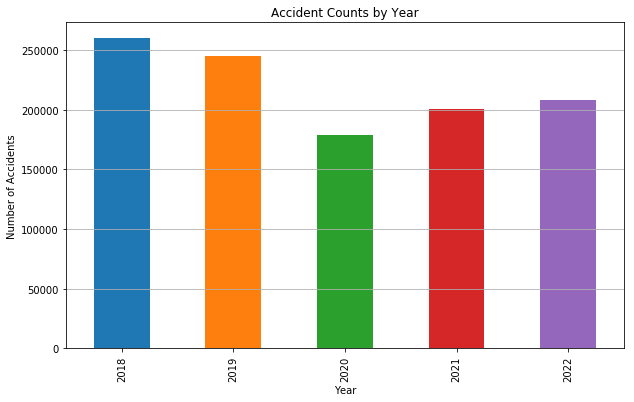

In [12]:
# Frequency of accidents by year
accident_counts_by_year = project['accident_year'].value_counts().sort_index()

# Display accident counts by year
print("Accident Counts by Year:")
print(accident_counts_by_year)

# Plotting accident counts by year
plt.figure(figsize=(10, 6))
accident_counts_by_year.plot(kind='bar')
plt.title('Accident Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

Number of Casualties Per Year:
accident_year
2018    504450
2019    476201
2020    324097
2021    365589
2022    391863
Name: number_of_casualties, dtype: int64


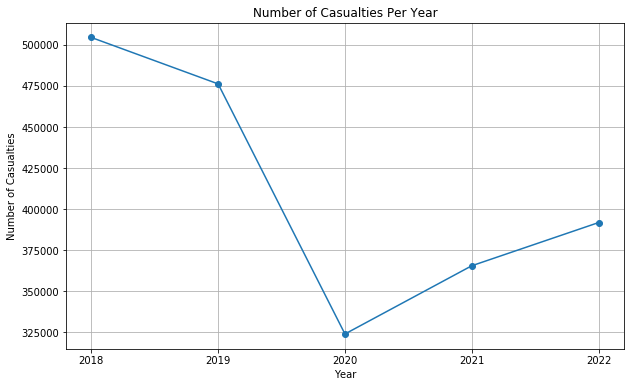

In [11]:
# Number of Casualties in Accidents per year
project['accident_year'] = project['accident_year'].astype(int)

casualties_per_year = project.groupby('accident_year')['number_of_casualties'].sum()

# Display the number of casualties per year
print("Number of Casualties Per Year:")
print(casualties_per_year)

# Plotting casualties per year
plt.figure(figsize=(10, 6))
plt.plot(casualties_per_year.index.astype(str), casualties_per_year.values, marker='o', linestyle='-')
plt.title('Number of Casualties Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.grid(True)
plt.show()


Distribution of Accident Severity:
Slight     823179
Serious    245915
Fatal       23780
Name: accident_severity, dtype: int64


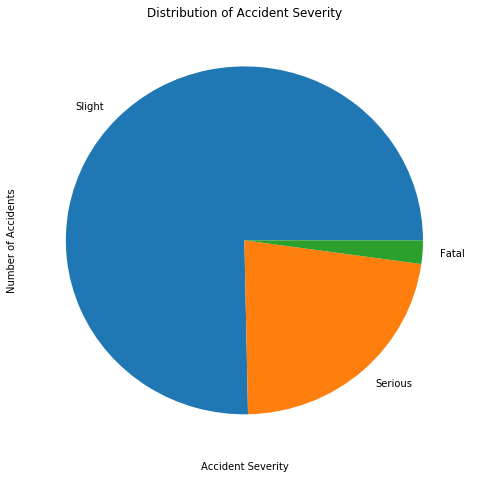

In [8]:
# Distribution of accident severity
severity_distribution = project['accident_severity'].value_counts()
print("\nDistribution of Accident Severity:")
print(severity_distribution)

# Chart of Accident Severity Distribution
plt.figure(figsize=(8, 8))
severity_distribution.plot(kind='pie')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()


Accident Counts by Geographic Area:
County                   410912
Unitary Authority        286615
Metropolitan District    182658
London Borough           156624
Council Area              56065
Name: geography, dtype: int64


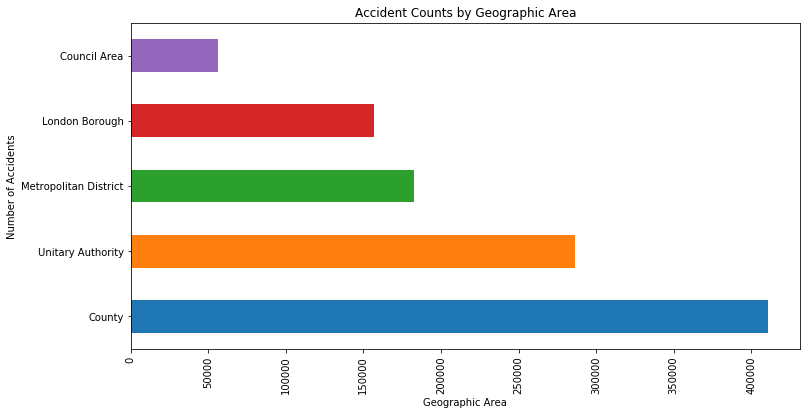

In [6]:
# Accident counts by geographic area
accident_counts = project['geography'].value_counts()
print("\nAccident Counts by Geographic Area:")
print(accident_counts)

# Chart of Accident Counts by Geographic Area
plt.figure(figsize=(12, 6))
accident_counts.plot(kind='barh')
plt.title('Accident Counts by Geographic Area')
plt.xlabel('Geographic Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


Accident Rates by Geographic Area:
Council Area             0.192628
County                   0.408870
London Borough           0.553363
Metropolitan District    0.385120
Unitary Authority        0.988831
dtype: float64


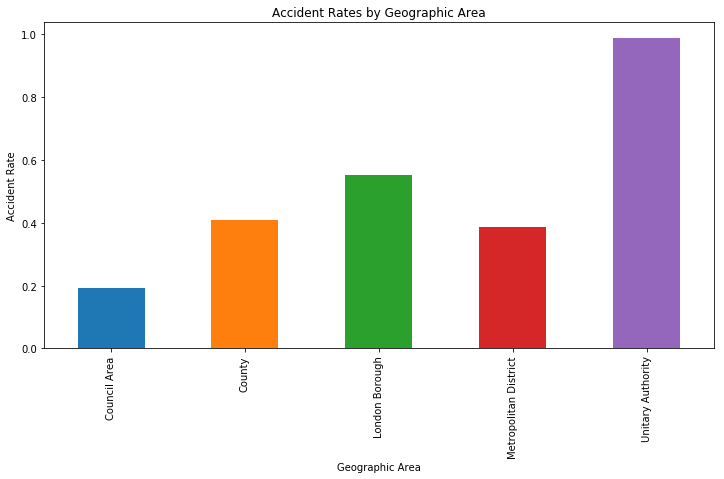

In [7]:
# Accident rates per population
accident_rates = accident_counts / project.groupby('geography')['population'].mean()
print("\nAccident Rates by Geographic Area:")
print(accident_rates)

# Chart of Accident Rates by Geographic Area
plt.figure(figsize=(12, 6))
accident_rates.plot(kind='bar')
plt.title('Accident Rates by Geographic Area')
plt.xlabel('Geographic Area')
plt.ylabel('Accident Rate')
plt.xticks(rotation=90)
plt.show()


Accident Counts by Month:
month
April        85299
August       94861
December     83745
February     81551
January      93034
July         97153
June         94899
March        82084
May          94245
November     92781
October      96283
September    96939
Name: accident_index, dtype: int64


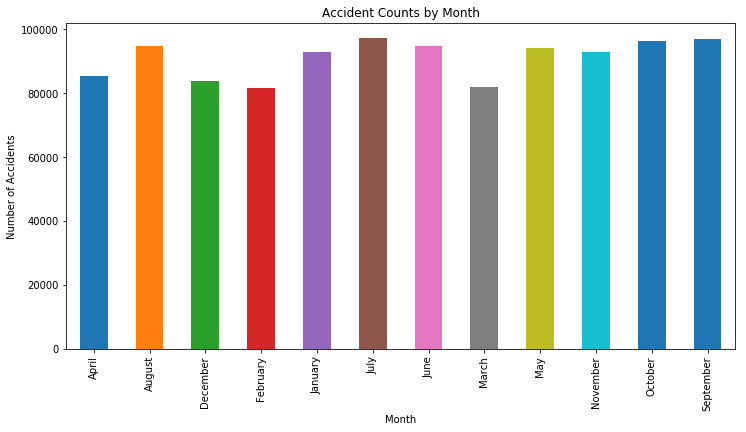

In [9]:
# Accident counts by month
accidents_by_month = project.groupby('month')['accident_index'].count()
print("\nAccident Counts by Month:")
print(accidents_by_month)

# Chart of Accident Counts by Month
plt.figure(figsize=(12, 6))
accidents_by_month.plot(kind='bar')
plt.title('Accident Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


Accident Counts by Day of the Week:
day_of_week
Friday       180860
Monday       152596
Saturday     153098
Sunday       127713
Thursday     162805
Tuesday      155841
Wednesday    159961
Name: accident_index, dtype: int64


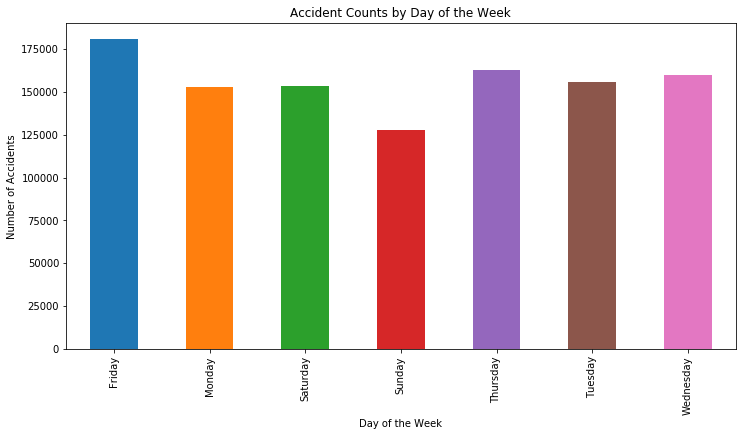

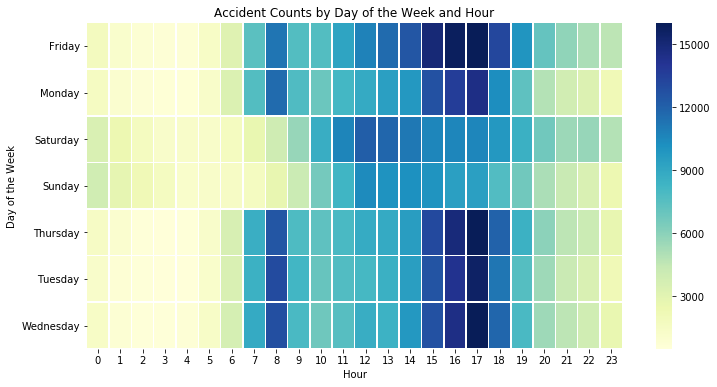

In [10]:
# Accident counts by day of the week
accidents_by_day = project.groupby('day_of_week')['accident_index'].count()
print("\nAccident Counts by Day of the Week:")
print(accidents_by_day)

# Chart of Accident Counts by Day of the Week
plt.figure(figsize=(12, 6))
accidents_by_day.plot(kind='bar')
plt.title('Accident Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
accidents_by_day_hour = project.pivot_table(index='day_of_week', columns='hour', values='accident_index', aggfunc='count')
sns.heatmap(accidents_by_day_hour, cmap='YlGnBu', linewidths=.5)
plt.title('Accident Counts by Day of the Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()

Light Conditions During Accidents

              light_conditions   count
0                     Daylight  797549
1        Darkness - lights lit  208817
2       Darkness - no lighting   65438
3  Darkness - lighting unknown   13255
4      Darkness - lights unlit    7815


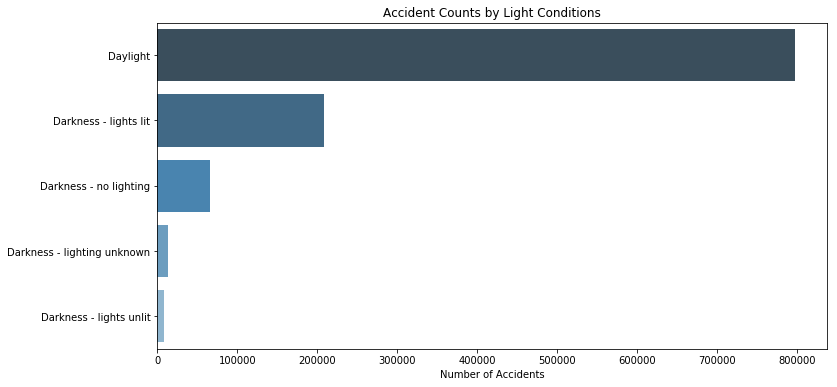

In [44]:
# Light Conditions During Accidents
light_conditions_counts = project['light_conditions'].value_counts()
# Convert to a DataFrame
light_conditions_counts = light_conditions_counts.reset_index()
light_conditions_counts.columns = ['light_conditions', 'count']

print("Light Conditions During Accidents\n")
print(light_conditions_counts)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='light_conditions', data=light_conditions_counts, palette='Blues_d')
plt.title('Accident Counts by Light Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('')
plt.show()

Weather Conditions During Accidents

      weather_conditions   count
0     Fine no high winds  892937
1  Raining no high winds  123888
2                  Other   22941
3                Unknown   15565
4   Raining + high winds   13203
5      Fine + high winds   12108
6  Snowing no high winds    5375
7            Fog or mist    4982
8   Snowing + high winds    1875


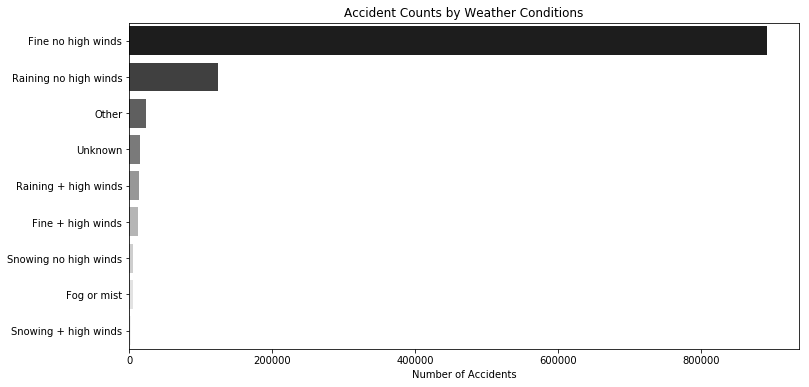

In [49]:
#Weather Conditions During Accidents
weather_conditions_counts = project['weather_conditions'].value_counts()
# Convert to a DataFrame
weather_conditions_counts = weather_conditions_counts.reset_index()
weather_conditions_counts.columns = ['weather_conditions', 'count']

print("Weather Conditions During Accidents\n")
print(weather_conditions_counts)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='weather_conditions', data=weather_conditions_counts, palette='Greys_r')
plt.title('Accident Counts by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('')
plt.show()

Road Surface Conditions During Accidents

  road_surface_conditions   count
0                     Dry  788580
1             Wet or damp  284874
2            Frost or ice   12851
3                    Snow    5042
4    Flood over 3cm. deep    1527


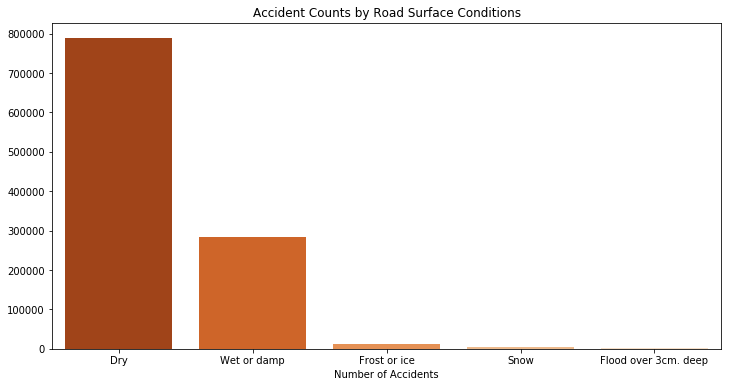

In [52]:
#Road Surface Conditions During Accidents
road_surface_conditions_counts = project['road_surface_conditions'].value_counts()
# Convert to a DataFrame
road_surface_conditions_counts = road_surface_conditions_counts.reset_index()
road_surface_conditions_counts.columns = ['road_surface_conditions', 'count']

print("Road Surface Conditions During Accidents\n")
print(road_surface_conditions_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x='road_surface_conditions', y='count', data=road_surface_conditions_counts, palette='Oranges_r')
plt.title('Accident Counts by Road Surface Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('')
plt.show()

Vehicle Type During Accidents

           vehicle_type   count
0                   Car  814567
1                  Bike  153803
2                   Van   91482
3                   Bus   20755
4                 Other    9842
5  Agricultural Vehicle    2425


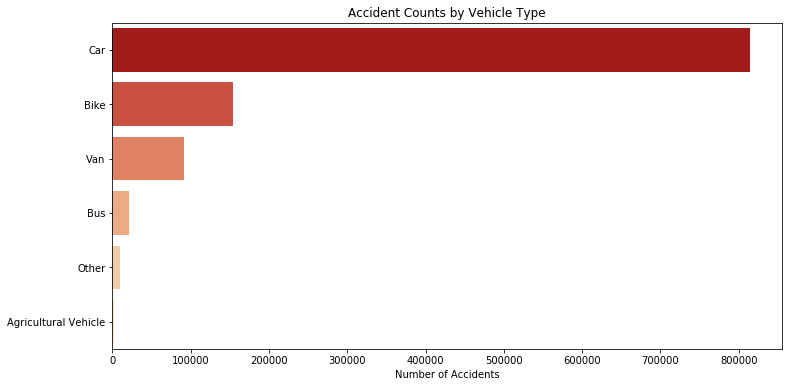

In [61]:
#Vehicle Type During Accidents
# Grouping Vehicle types for clearer understanding 
def categorize_vehicle_type(vehicle_type):
    if vehicle_type in ['Car', 'Taxi/Private hire car']:
        return 'Car'
    elif vehicle_type in ['Bus', 'Bus or coach (17 or more pass seats)', 'Minibus (8 - 16 passenger seats)']:
        return 'Bus'
    elif vehicle_type in ['Bike', 'Motorcycle 125cc and under', 'Motorcycle over 500cc', 'Pedal cycle', 'Electric motorcycle',
                          'Motorcycle over 125cc and up to 500cc', 'Motorcycle 50cc and under', 'Motorcycle - unknown cc']:
        return 'Bike'
    elif vehicle_type in ['Van', 'Van / Goods 3.5 tonnes mgw or under', 'Goods 7.5 tonnes mgw and over',
                          'Goods over 3.5t. and under 7.5t', 'Goods vehicle - unknown weight']:
        return 'Van'
    elif vehicle_type == 'Agricultural vehicle':
        return 'Agricultural Vehicle'
    else:
        return 'Other'

# Update the 'vehicle_type' column with the categorized values
project['vehicle_type'] = project['vehicle_type'].apply(categorize_vehicle_type)

# Display the first few rows of the updated column
#print(project['vehicle_type'].head())

vehicle_type_counts = project['vehicle_type'].value_counts()
# Convert to a DataFrame
vehicle_type_counts = vehicle_type_counts.reset_index()
vehicle_type_counts.columns = ['vehicle_type', 'count']

print("Vehicle Type During Accidents\n")
print(vehicle_type_counts)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='vehicle_type', y='count', data=vehicle_type_counts, palette='OrRd_r')
plt.title('Accident Counts by Vehicle Type')
plt.xlabel('Number of Accidents')
plt.ylabel('')
plt.show()

In [24]:
# Casualty statistics by geographic area
print("\nAccident Statistics by Geographic Area:")
accident_stats = project.groupby('geography')[['number_of_casualties']].describe().T
print(accident_stats)


Accident Statistics by Geographic Area:
geography                   Council Area         County  London Borough  \
number_of_casualties count  56065.000000  410912.000000   156624.000000   
                     mean       1.932757       1.971987        1.618085   
                     std        1.542668       1.555050        1.211546   
                     min        1.000000       1.000000        1.000000   
                     25%        1.000000       1.000000        1.000000   
                     50%        1.000000       1.000000        1.000000   
                     75%        2.000000       2.000000        2.000000   
                     max       29.000000      52.000000       16.000000   

geography                   Metropolitan District  Unitary Authority  
number_of_casualties count          182658.000000      286615.000000  
                     mean                1.937594           1.870729  
                     std                 1.403655           1.387219  

### Inferential analysis

In [26]:
# Check for Missing Data
missing_values = project.isnull().sum()
print("Missing Values:")
print(missing_values)

# Filter Out Missing Data
project_cleaned = project.dropna(subset=['density', 'accident_severity'])

# Ensure 'accident_severity' contains the expected categories
print("Unique Accident Severity Categories:")
print(project_cleaned['accident_severity'].unique())

# Check the number of observations in each 'accident_severity' category
print("Sample Size by Accident Severity:")
print(project_cleaned['accident_severity'].value_counts())

# Perform ANOVA
from scipy.stats import f_oneway

# Separate data into groups based on 'accident_severity'
severity_groups = {}
for severity in project_cleaned['accident_severity'].unique():
    severity_groups[severity] = project_cleaned[project_cleaned['accident_severity'] == severity]['density']

# Perform ANOVA test
f_statistic, p_value = f_oneway(*severity_groups.values())

# Print results
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value:.2e}")

# Interpret the results
if not np.isnan(f_statistic) and not np.isnan(p_value):
    if p_value < 0.05:
        print("There are statistically significant differences in accident severity across different levels of population density.")
    else:
        print("There are no statistically significant differences in accident severity across different levels of population density.")
else:
    print("Error: Unable to perform ANOVA due to missing or invalid data.")


Missing Values:
accident_index                             0
accident_year                              0
location                                   0
density                                    0
longitude                                  0
latitude                                   0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
day_of_week                                0
period                                     0
month                                      0
date                                       0
local_authority_highway                    0
road_type                                  0
speed_limit                                0
junction_detail                            0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surface_conditions                    0
urban_or_rural_area                    

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(project_cleaned['density'], project_cleaned['accident_severity'])

# Print the results
print("Tukey's HSD Post Hoc Test Results:")
print(tukey_results)

# Print summary table with significant differences
tukey_results.summary()

Tukey's HSD Post Hoc Test Results:
 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
 group1  group2  meandiff   lower     upper   reject
----------------------------------------------------
 Fatal  Serious  769.0406  722.6084  815.4728  True 
 Fatal   Slight 1210.6808 1165.7071 1255.6546  True 
Serious  Slight  441.6403  425.9276  457.3529  True 
----------------------------------------------------


group1,group2,meandiff,lower,upper,reject
Fatal,Serious,769.0406,722.6084,815.4728,True
Fatal,Slight,1210.6808,1165.7071,1255.6546,True
Serious,Slight,441.6403,425.9276,457.3529,True


In [30]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select relevant features (independent variables) and target variable
X = project[['density']]
y = project['accident_severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7520256204963971
Classification Report:
             precision    recall  f1-score   support

      Fatal       0.00      0.00      0.00      4705
    Serious       0.53      0.01      0.01     49593
     Slight       0.75      1.00      0.86    164277

avg / total       0.69      0.75      0.65    218575



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select relevant features (independent variables) and target variable
X = project[['density']]
y = project['accident_severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier with multinomial setting
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the classifier
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7515818368980899
Classification Report:
             precision    recall  f1-score   support

      Fatal       0.00      0.00      0.00      4705
    Serious       0.00      0.00      0.00     49593
     Slight       0.75      1.00      0.86    164277

avg / total       0.56      0.75      0.64    218575



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
